/home/scc/mf9638/miniconda3/envs/XUQ-TimeSeriesForecast/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
[rank: 0] Seed set to 1
[rank: 0] Seed set to 1
/home/scc/mf9638/miniconda3/envs/XUQ-TimeSeriesForecast/lib/python3.10/site-packages/neuralforecast/common/_base_model.py:204: UserWarning: val_check_steps is greater than max_steps,                     setting val_check_steps to max_steps
  warnings.warn(
/home/scc/mf9638/miniconda3/envs/XUQ-TimeSeriesForecast/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/scc/mf9638/miniconda3/envs/XUQ-TimeSeriesForec ...
GPU available: Tru

/home/scc/mf9638/miniconda3/envs/XUQ-TimeSeriesForecast/lib/python3.10/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 49: 100%|██████████| 1/1 [00:00<00:00, 71.05it/s, v_num=1425570, train_loss_step=13.90, train_loss_epoch=14.50] 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 49: 100%|██████████| 1/1 [00:00<00:00, 33.82it/s, v_num=1425570, train_loss_step=13.90, train_loss_epoch=13.90]

`Trainer.fit` stopped: `max_steps=50` reached.


Epoch 49: 100%|██████████| 1/1 [00:00<00:00, 31.26it/s, v_num=1425570, train_loss_step=13.90, train_loss_epoch=13.90]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [MIG-b7a4f4c3-357e-557f-ab46-11c2a3d05566]

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.4 M 
-----------------------------------------------
2.4 M     Trainable params
0         Non-trainable params
2.4 M     Total params
9.751     Total estimated model params size (MB)


Epoch 49: 100%|██████████| 1/1 [00:00<00:00, 63.34it/s, v_num=1425570, train_loss_step=17.40, train_loss_epoch=17.80] 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 49: 100%|██████████| 1/1 [00:00<00:00, 35.97it/s, v_num=1425570, train_loss_step=17.40, train_loss_epoch=17.40]

`Trainer.fit` stopped: `max_steps=50` reached.


Epoch 49: 100%|██████████| 1/1 [00:00<00:00, 33.73it/s, v_num=1425570, train_loss_step=17.40, train_loss_epoch=17.40]


/home/scc/mf9638/miniconda3/envs/XUQ-TimeSeriesForecast/lib/python3.10/site-packages/utilsforecast/processing.py:362: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/home/scc/mf9638/miniconda3/envs/XUQ-TimeSeriesForecast/lib/python3.10/site-packages/utilsforecast/processing.py:414: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/home/scc/mf9638/miniconda3/envs/XUQ-TimeSeriesForecast/lib/python3.10/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
/home/scc/mf9638/miniconda3/envs/XUQ-TimeSeriesForecast/lib/python3.10/site-packages/lightning_fa

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 229.65it/s]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [MIG-b7a4f4c3-357e-557f-ab46-11c2a3d05566]


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 205.83it/s]


/home/scc/mf9638/miniconda3/envs/XUQ-TimeSeriesForecast/lib/python3.10/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


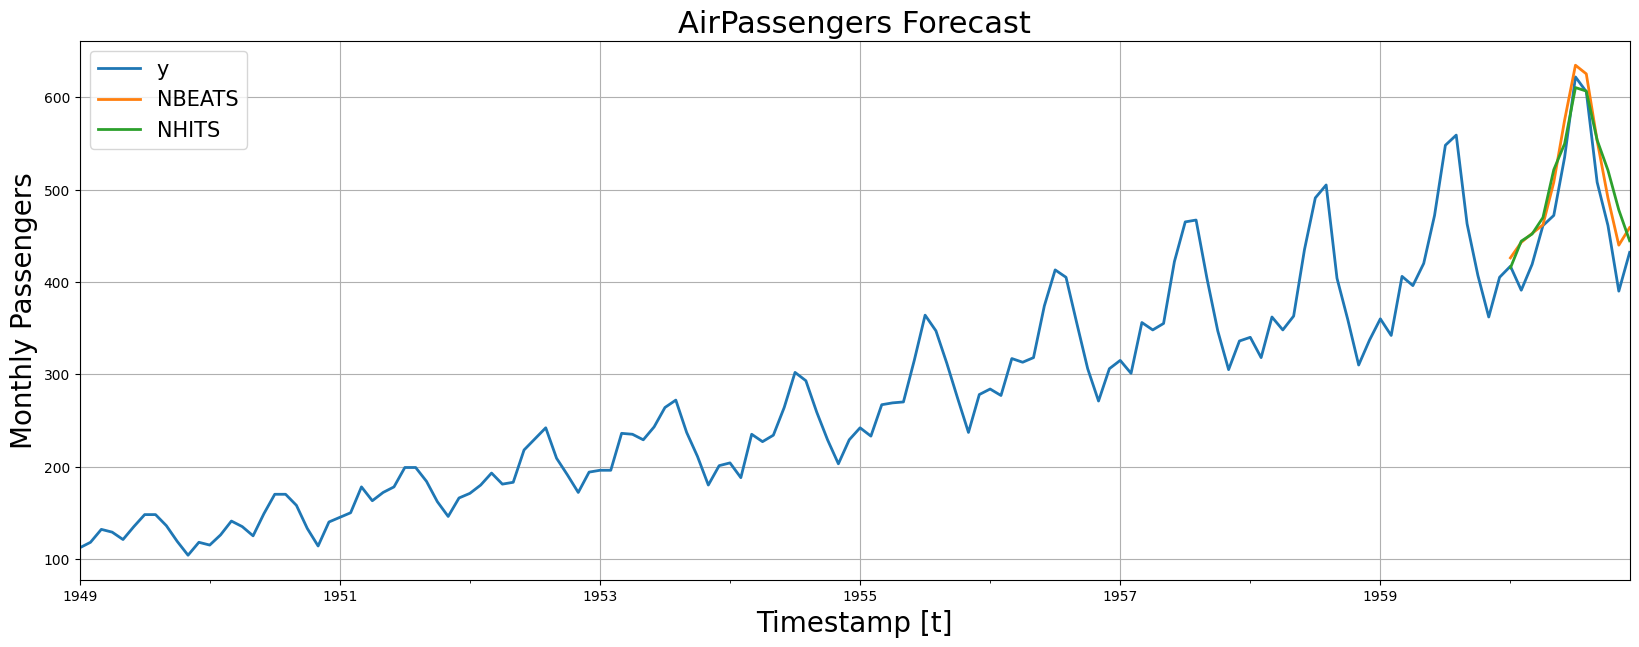

In [5]:
import numpy as np
import pandas as pd
from IPython.display import display, Markdown

import matplotlib.pyplot as plt
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS
from neuralforecast.utils import AirPassengersDF

# Split data and declare panel dataset
Y_df = AirPassengersDF
Y_train_df = Y_df[Y_df.ds<='1959-12-31'] # 132 train
Y_test_df = Y_df[Y_df.ds>'1959-12-31'] # 12 test

# Fit and predict with NBEATS and NHITS models
horizon = len(Y_test_df)
models = [NBEATS(input_size=2 * horizon, h=horizon, max_steps=50),
          NHITS(input_size=2 * horizon, h=horizon, max_steps=50)]
nf = NeuralForecast(models=models, freq='M')
nf.fit(df=Y_train_df)
Y_hat_df = nf.predict().reset_index()

# Plot predictions
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
Y_hat_df = Y_test_df.merge(Y_hat_df, how='left', on=['unique_id', 'ds'])
plot_df = pd.concat([Y_train_df, Y_hat_df]).set_index('ds')

plot_df[['y', 'NBEATS', 'NHITS']].plot(ax=ax, linewidth=2)

ax.set_title('AirPassengers Forecast', fontsize=22)
ax.set_ylabel('Monthly Passengers', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()